# Jacob Pan, Jacobfp2, CHBE 494 HW 8

## Question 1

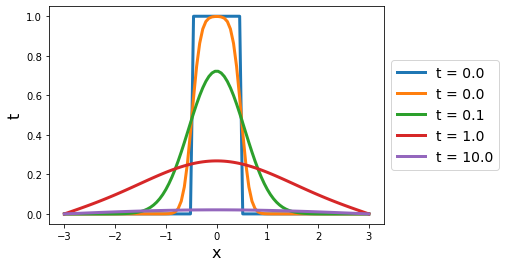

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

N = 100
lb = 0
rb = 0
x = np.linspace(-3,3,N)
delta = x[1] - x[0]

def func(c,t):
    eqn = 0*c
    
    # left boundary
    eqn[0] = 0
    
    for i in range(1,N-1):
        eqn[i] = (c[i+1]-2*c[i]+c[i-1])/delta/delta
    
    # right boundary
    eqn[-1] = 0
    
    return eqn


# inital condition
c0 = np.zeros(N)
tspan = [0, 0.01, 0.1, 1.0, 10.0]

for i in range(len(x)):
    if abs(x[i]) > 0.5:
        c0[i] = 0
    else:
        c0[i] = 1
#solve ode
c = odeint(func,c0,tspan)


# definte domain
for i,t in enumerate(tspan):
    plt.plot(x,c[i,:],lw=3,label="t = %.1f" % t)
    
plt.legend(fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('x',fontsize=16)
plt.ylabel('t',fontsize=16)
plt.show()

## Question 2

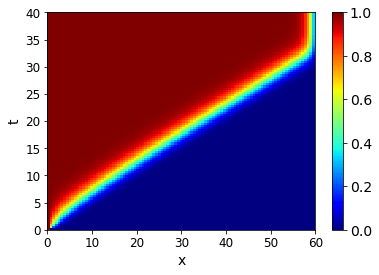

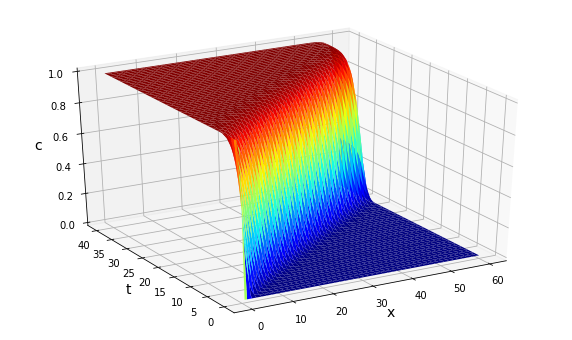

In [2]:
N = 100
x = np.linspace(0,60,N)
lb = 1
rb = 0


delta = x[1] - x[0]

def func(c,t):
    eqn = 0*c
    
    # left boundary
    eqn[0] = 0
    
    for i in range(1,N-1):
        eqn[i] = ((c[i+1]-2*c[i]+c[i-1])/delta/delta) + (c[i]*(1-c[i]))
    
    # right boundary
    eqn[-1] = 0
    
    return eqn

# inital condition
c0 = np.zeros(N)
c0[0] = lb   # left boundary condition
c0[-1] = rb  # right boundary condition

# tspan
tspan = np.linspace(0,40,100)

# solve ode
c = odeint(func,c0,tspan)

# plot solution
plt.pcolormesh(x,tspan,c,cmap='jet')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('x',fontsize=14)
plt.ylabel('t',fontsize=14)
plt.show()

# plot solution
X,T = np.meshgrid(x,tspan)
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, T, c, cmap='jet',lw=0)
ax.view_init(None, -120)
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('t',fontsize=14)
ax.set_zlabel('c',fontsize=14)
plt.show()

## Question 3

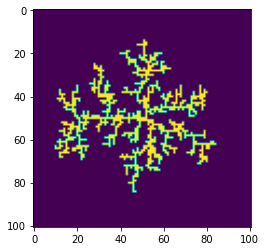

In [3]:
from numpy.random import randint


n = 101
px = int((n)/2)
py = int((n)/2)

p = 1000
A = [] 

for i in range(n):
    A.append(np.zeros(n))
A = np.array(A)
A[px][py] = 1


while p > 0:
    px = randint(n)
    py = randint(n)
    while A[px,py] == 0:
        #up
        if py < n - 1 and A[px][py + 1] == 1:
            A[px][py] = 1
            p = p - 1
        #down
        elif py > 0 and A[px][py - 1] == 1:
            A[px][py] = 1
            p = p - 1
        #left
        elif px < n - 1 and A[px + 1][py] == 1:
            A[px][py] = 1
            p = p - 1
        #right
        elif px > 0 and A[px - 1][py] == 1:
            A[px][py] = 1
            p = p - 1
        else:
            move =  randint(4)
            #up
            if move == 0:
                if py < n - 1:
                    py += 1
                else: 
                    move = randint(4)
            #down
            elif move == 1:
                if py > 0:
                    py -= 1
                else:
                    move = randint(4)
            #left
            elif move == 2:
                if px < n - 1:
                    px += 1
                else:
                    move = randint(4)
            #right
            elif move == 3:
                if px > 0:
                    px -=1
                else:
                    move = randint(4)

plt.imshow(A)
plt.show()

## Question 4

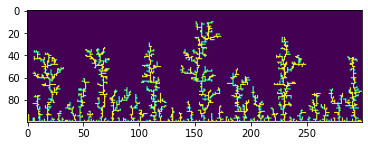

In [4]:
n = 100
p = 3000
A = [] 

for i in range(n):
    A.append(np.zeros(3*n))
A = np.array(A)
A[-1,:] = 1


while p > 0:
    px = 0
    py = randint(3*n)
    while A[px,py] == 0:
        #up
        if py < 3*n - 1 and A[px][py + 1] == 1:
            A[px][py] = 1
            p = p - 1
        #down
        elif py > 0 and A[px][py - 1] == 1:
            A[px][py] = 1
            p = p - 1
        #left
        elif px < 3*n - 1 and A[px + 1][py] == 1:
            A[px][py] = 1
            p = p - 1
        #right
        elif px > 0 and A[px - 1][py] == 1:
            A[px][py] = 1
            p = p - 1
        else:
            move =  randint(4)
            #up
            if move == 0:
                if py < 3*n - 1:
                    py += 1
                else: 
                    move = randint(4)
            #down
            elif move == 1:
                if py > 0:
                    py -= 1
                else:
                    move = randint(4)
            #left
            elif move == 2:
                if px < 3*n - 1:
                    px += 1
                else:
                    move = randint(4)
            #right
            elif move == 3:
                if px > 0:
                    px -=1
                else:
                    move = randint(4)
plt.imshow(A)
plt.show()

## Question 5

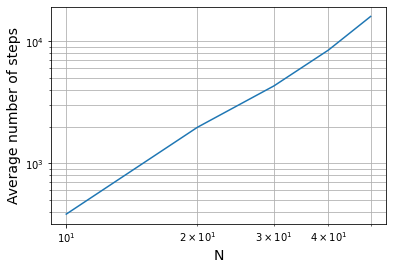

In [5]:
nvals = [10, 20, 30, 40, 50] 
def particles(arg):
    n = arg
    
    average = 0
    for i in range(400):
        step = 0
        px = randint(n)
        py = randint(n)
        sy = randint(n)
        sx = randint(n)
    
        while px != sx or py != sy:
            movep = randint(4)
            #up
            if movep == 0:
                if py < n - 1:
                    py += 1
                    step += 1
            #down
            elif movep == 1:
                if py > 0:
                    py -= 1
                    step += 1
            #left
            elif movep == 2:
                if px < n - 1:
                    px += 1
                    step += 1
            #right
            elif movep == 3:
                if px > 0:
                    px -=1
                    step += 1

            moves =  randint(4)
            if moves == 0:
                if sy < n - 1:
                    sy += 1
                    step += 1
            #down
            elif moves == 1:
                if sy > 0:
                    sy -= 1
                    step += 1
            #left
            elif moves == 2:
                if sx < n - 1:
                    sx += 1
                    step += 1
            #right
            elif moves == 3:
                if sx > 0:
                    sx -=1
                    step += 1

      
        average += step
    final = average / 400
    return final

yvalues = []
for i in range(len(nvals)):
    yvalues.append(particles(nvals[i]))

plt.loglog(nvals, yvalues)
plt.xlabel("N", fontsize = 14)
plt.ylabel("Average number of steps", fontsize = 14)
plt.grid(which = "both")
plt.show()
       
 